In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\crime_data.csv")

In [3]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Hierarchical clustering

In [4]:
# Droping the uncessary column that is the Unnamed: 0

In [5]:
x=df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.head(3)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0


In [7]:
# set the graph 

In [8]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

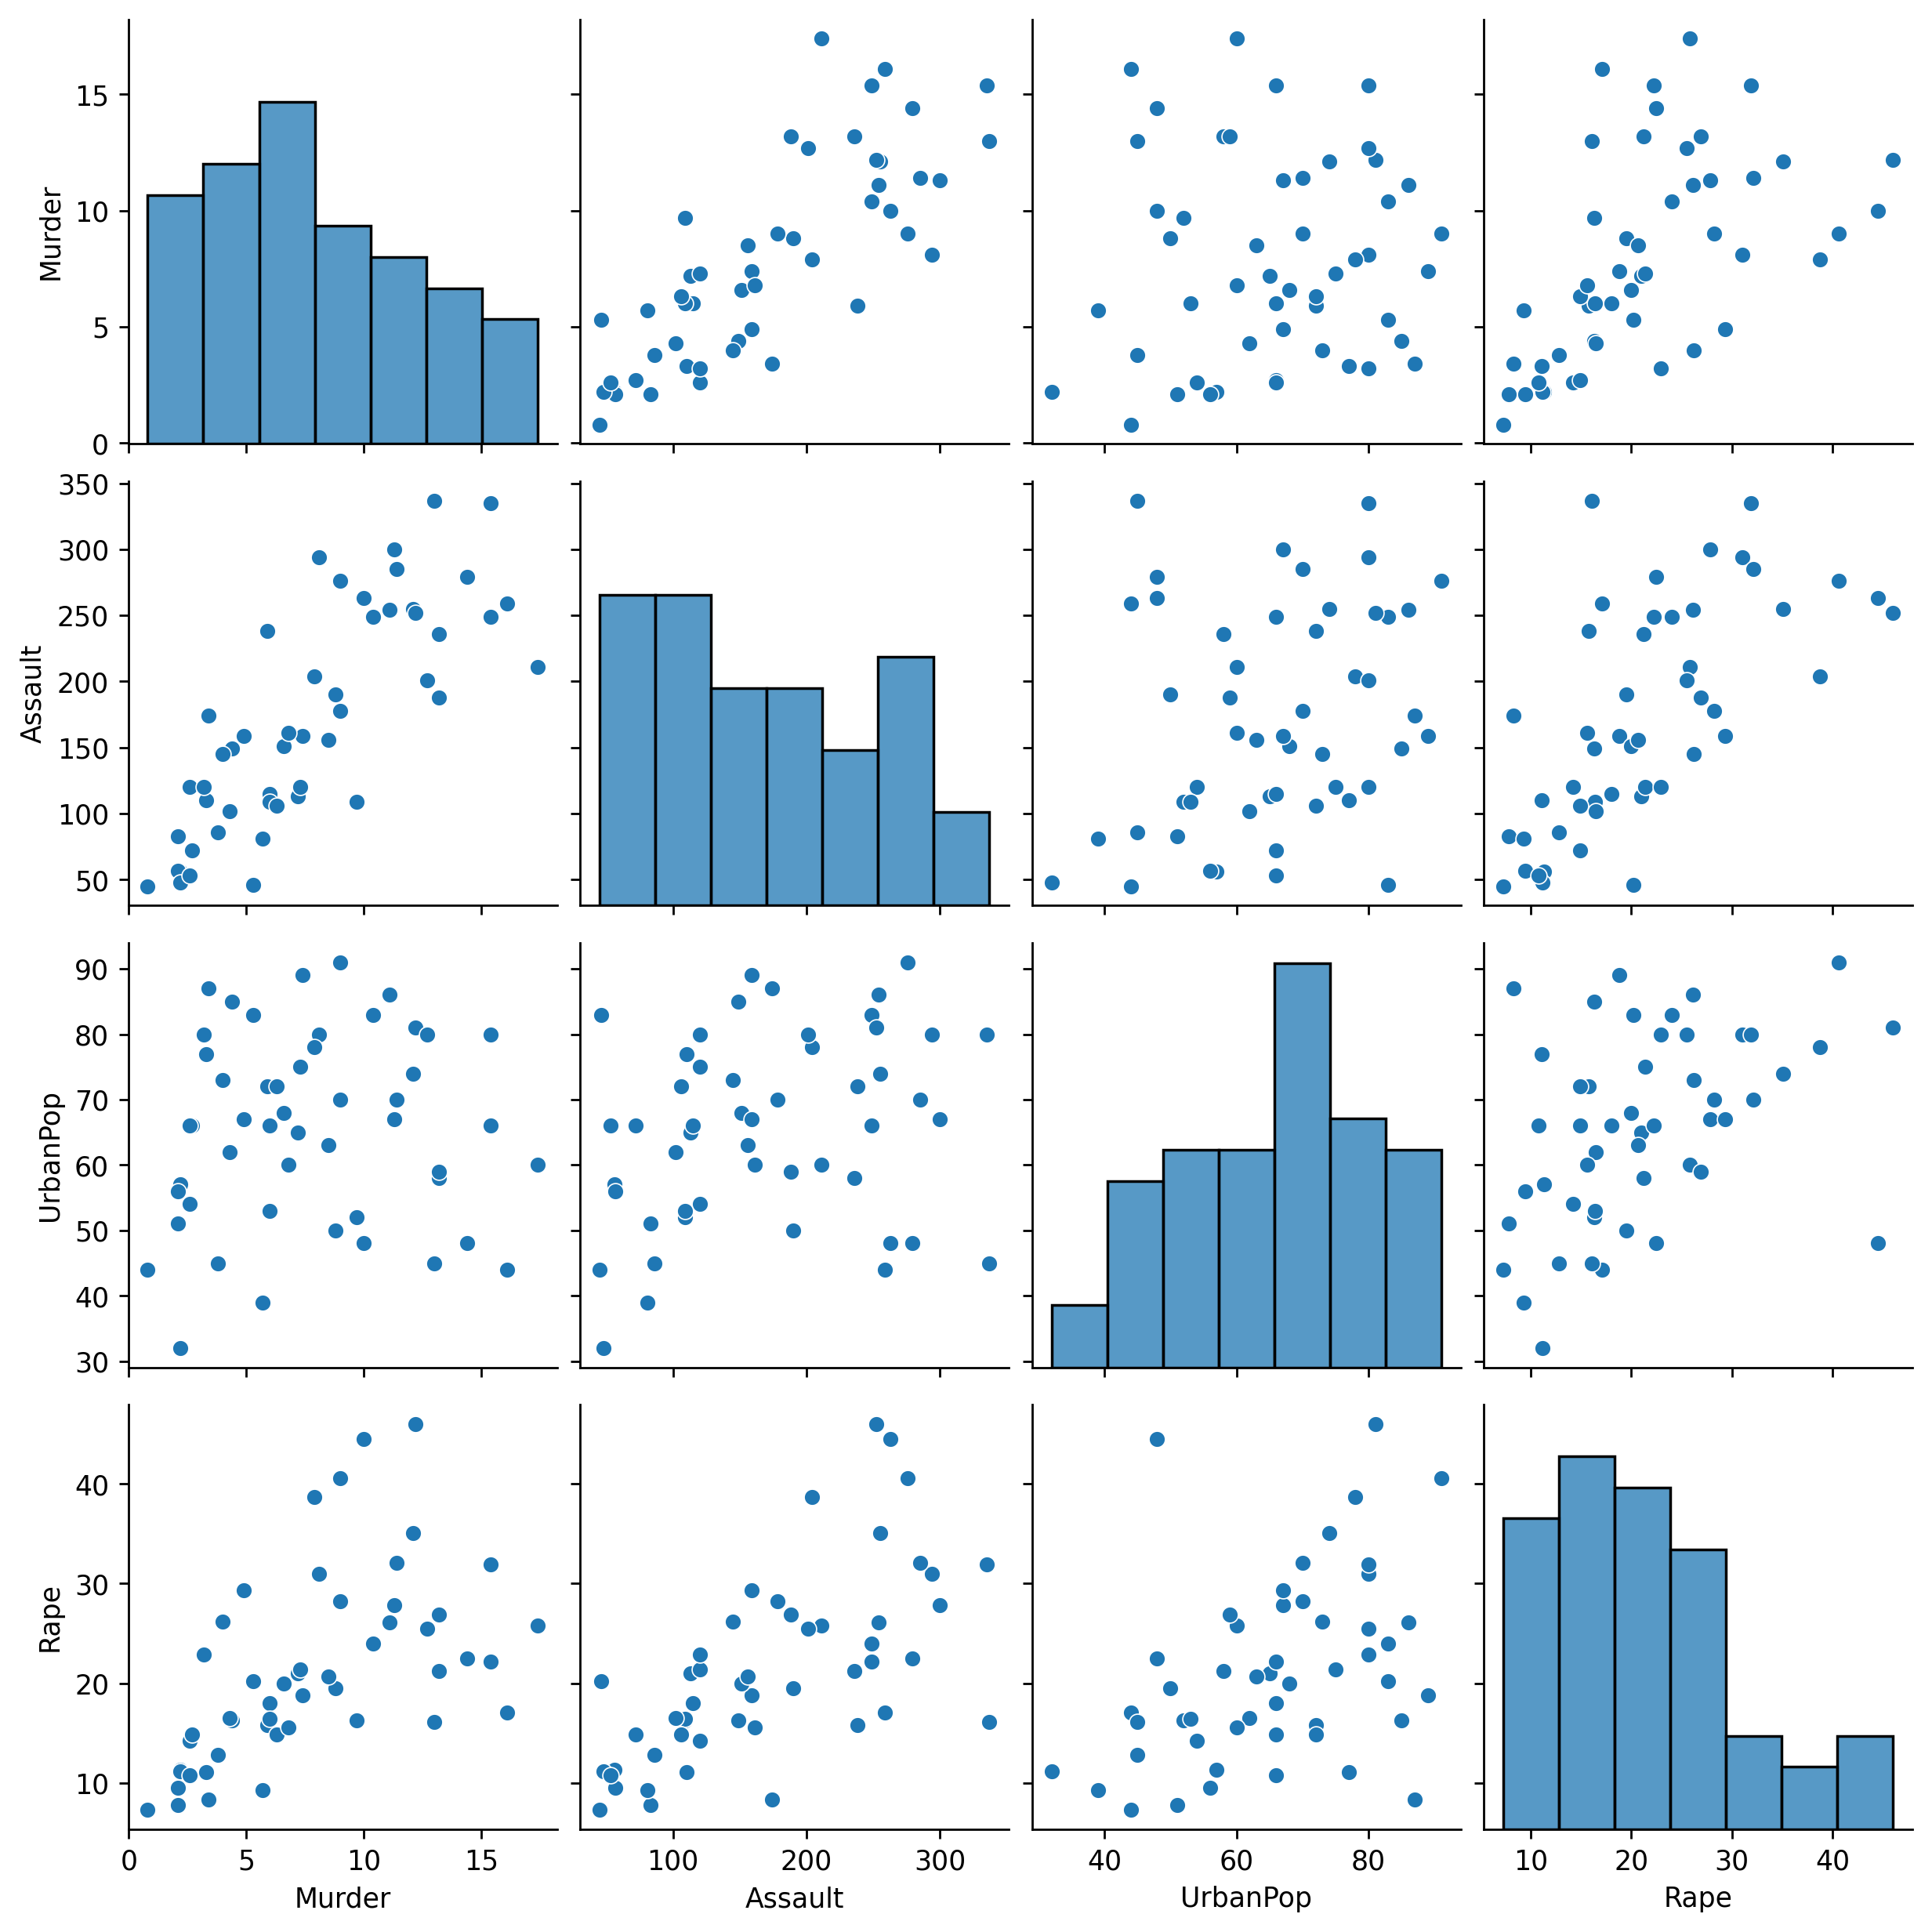

In [9]:
sb.pairplot(df)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)

In [27]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Create a Dendrogram

In [28]:
from scipy.cluster import hierarchy

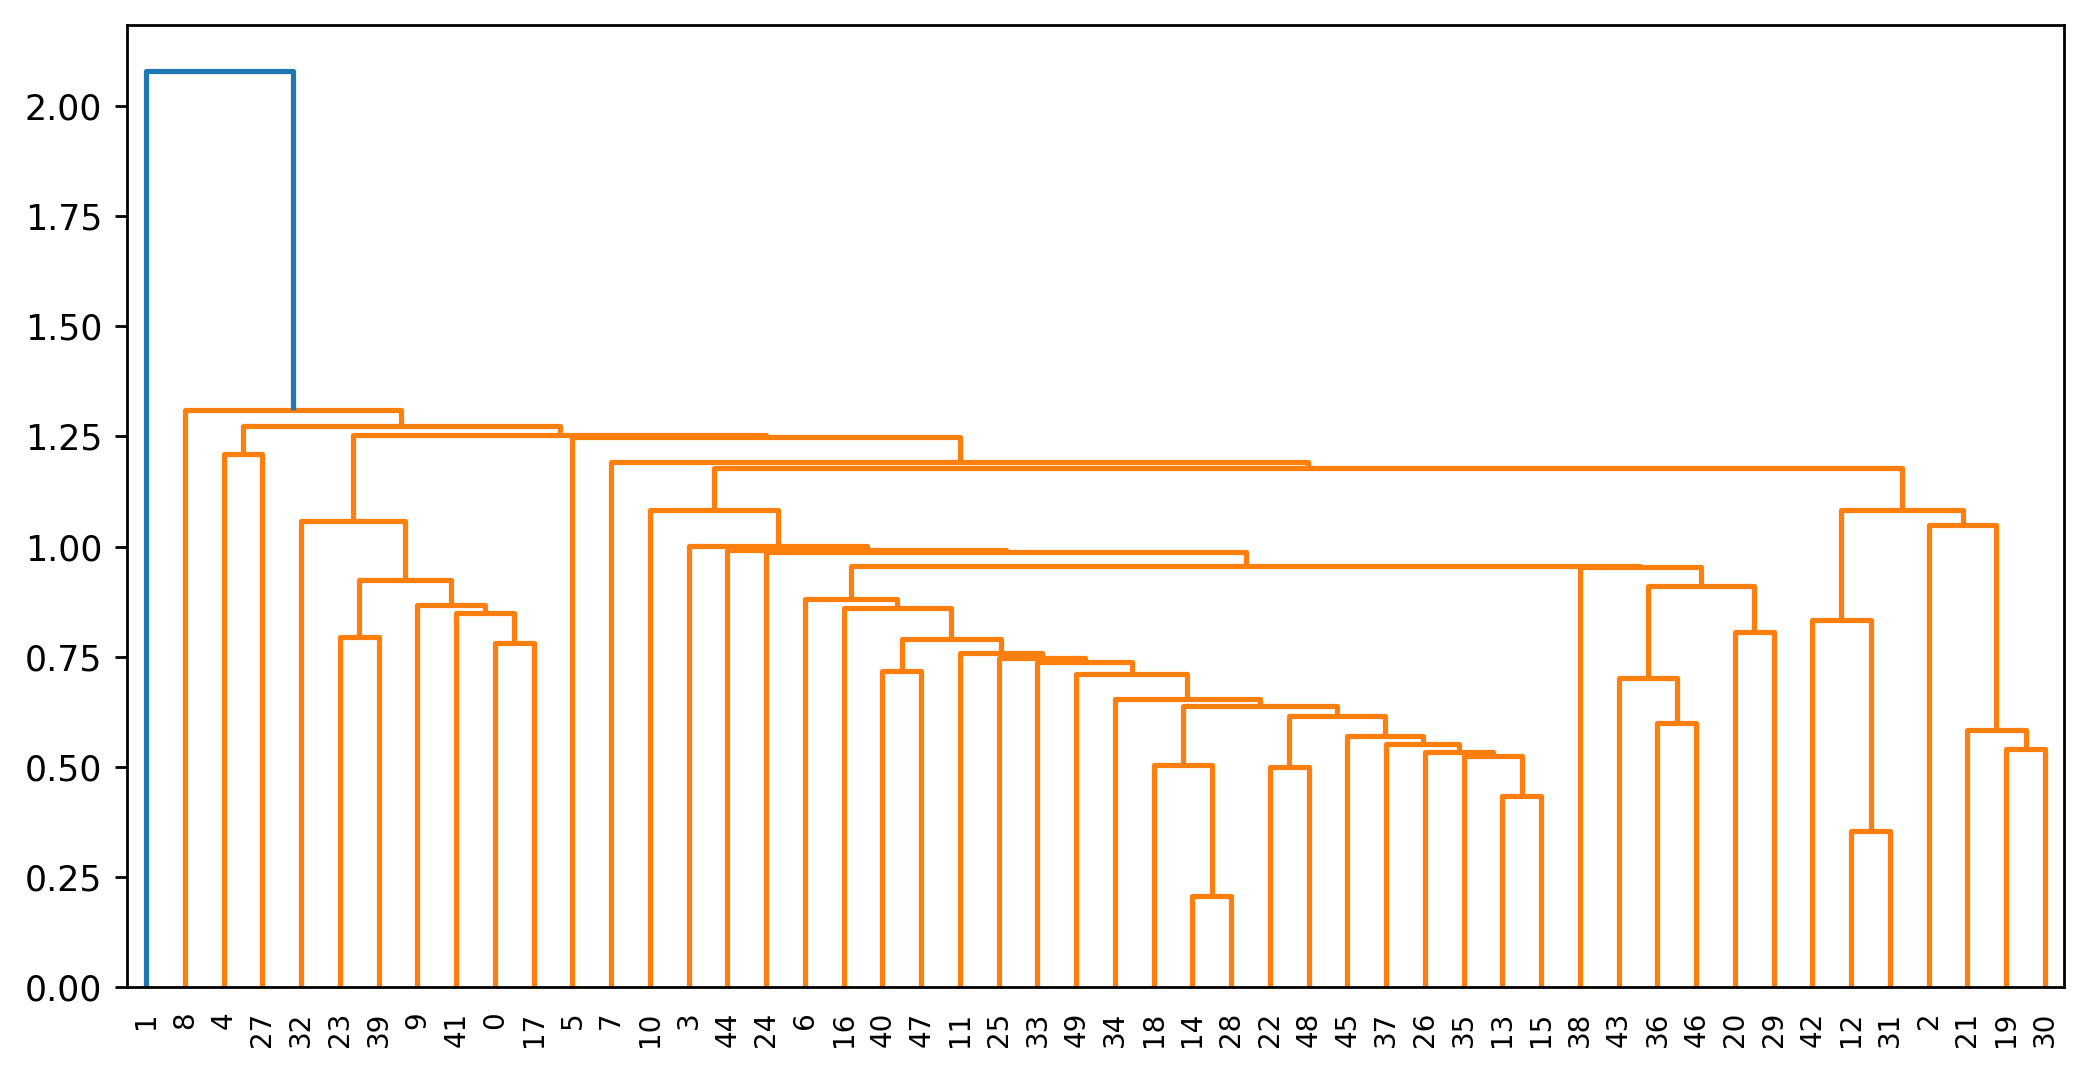

In [30]:
lk=hierarchy.linkage(x,method='single')
dendrogram=hierarchy.dendrogram(lk)

In [16]:
# In the above dendrogram the method of distance calculation is single
# so it is little bit confusing to calculate the number of cluster

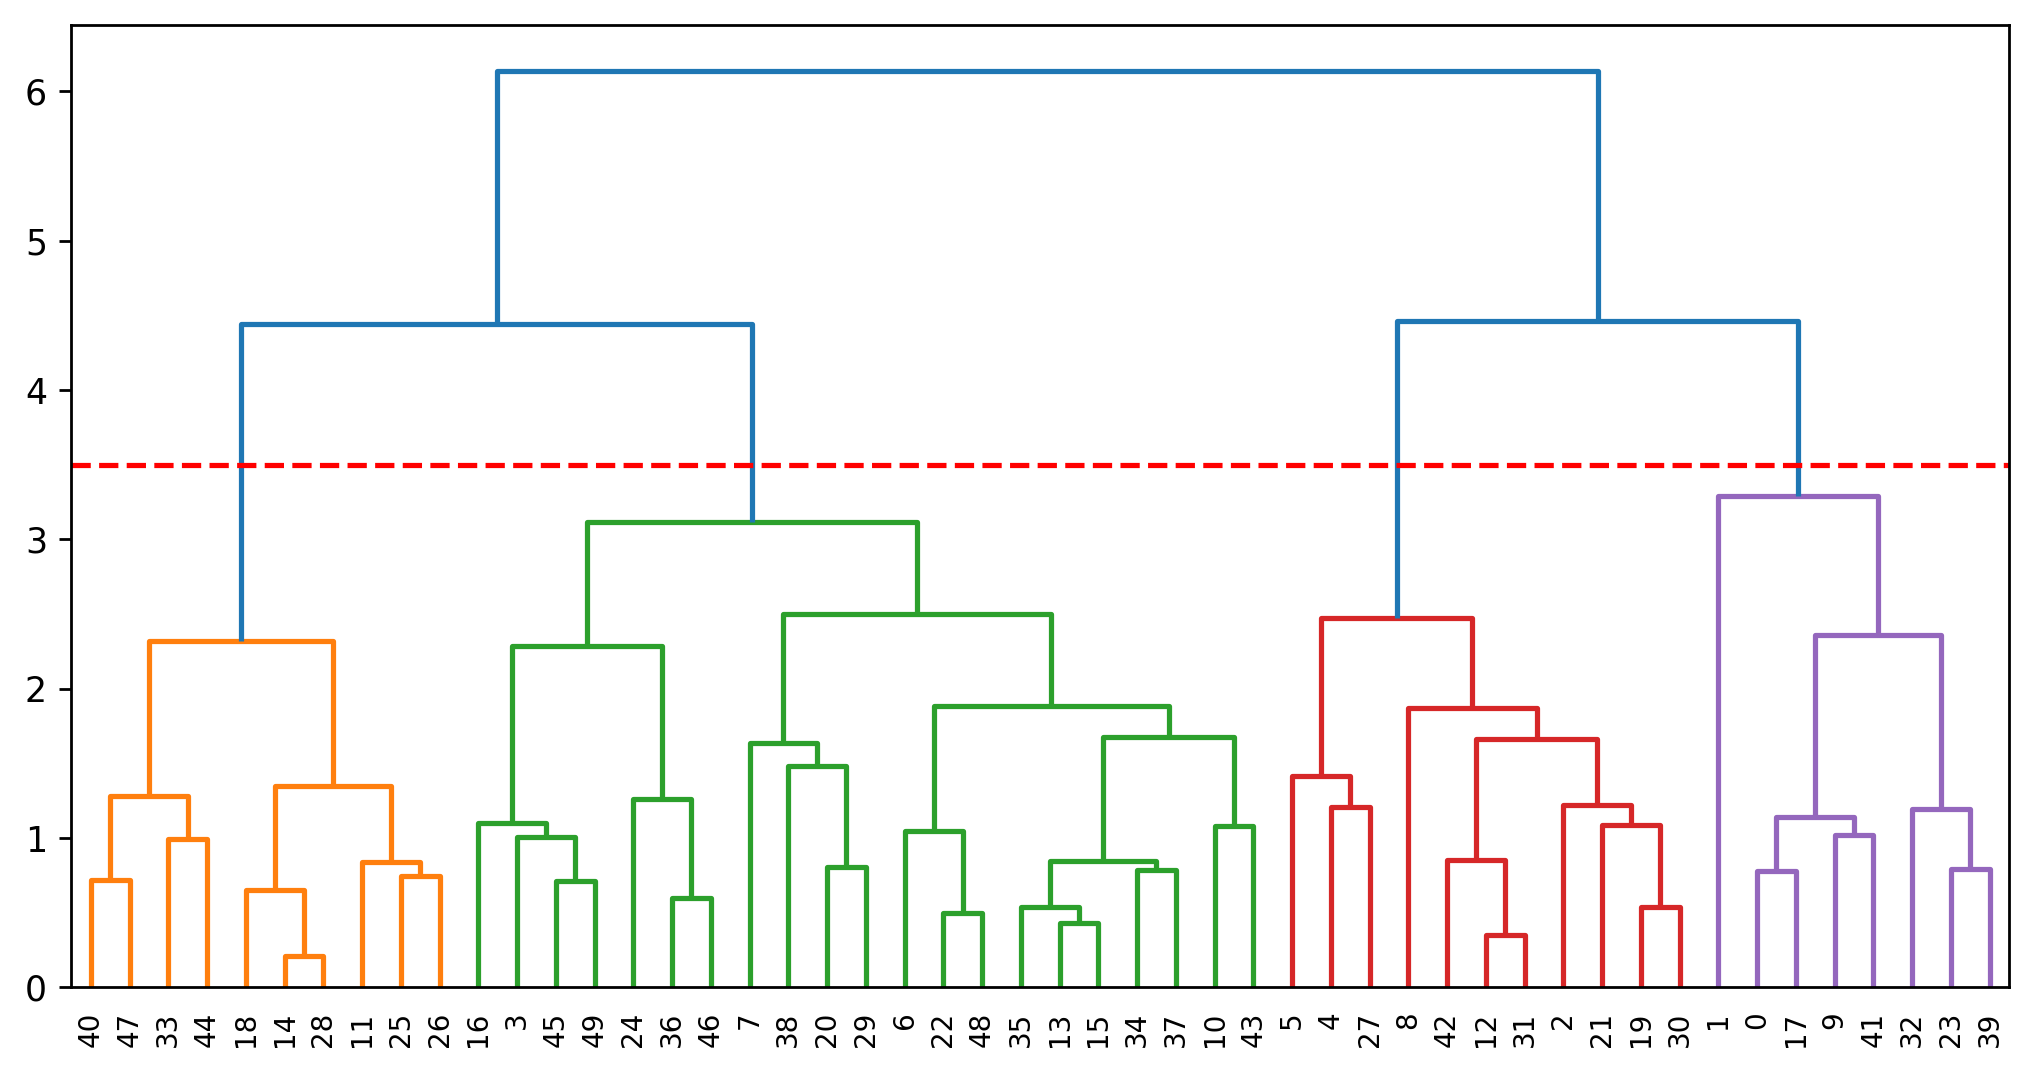

In [32]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=3.5,c='red',linestyle='--')

## Model Building

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
hc=AgglomerativeClustering(n_clusters=4)

In [34]:
y=hc.fit_predict(x)

In [35]:
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [36]:
# Create new column to store cluster label

In [40]:
df['cluster']=y

In [41]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [52]:
df.reset_index(inplace=True)

In [53]:
df.drop(columns=['index'],inplace=True)

C:\Users\psaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

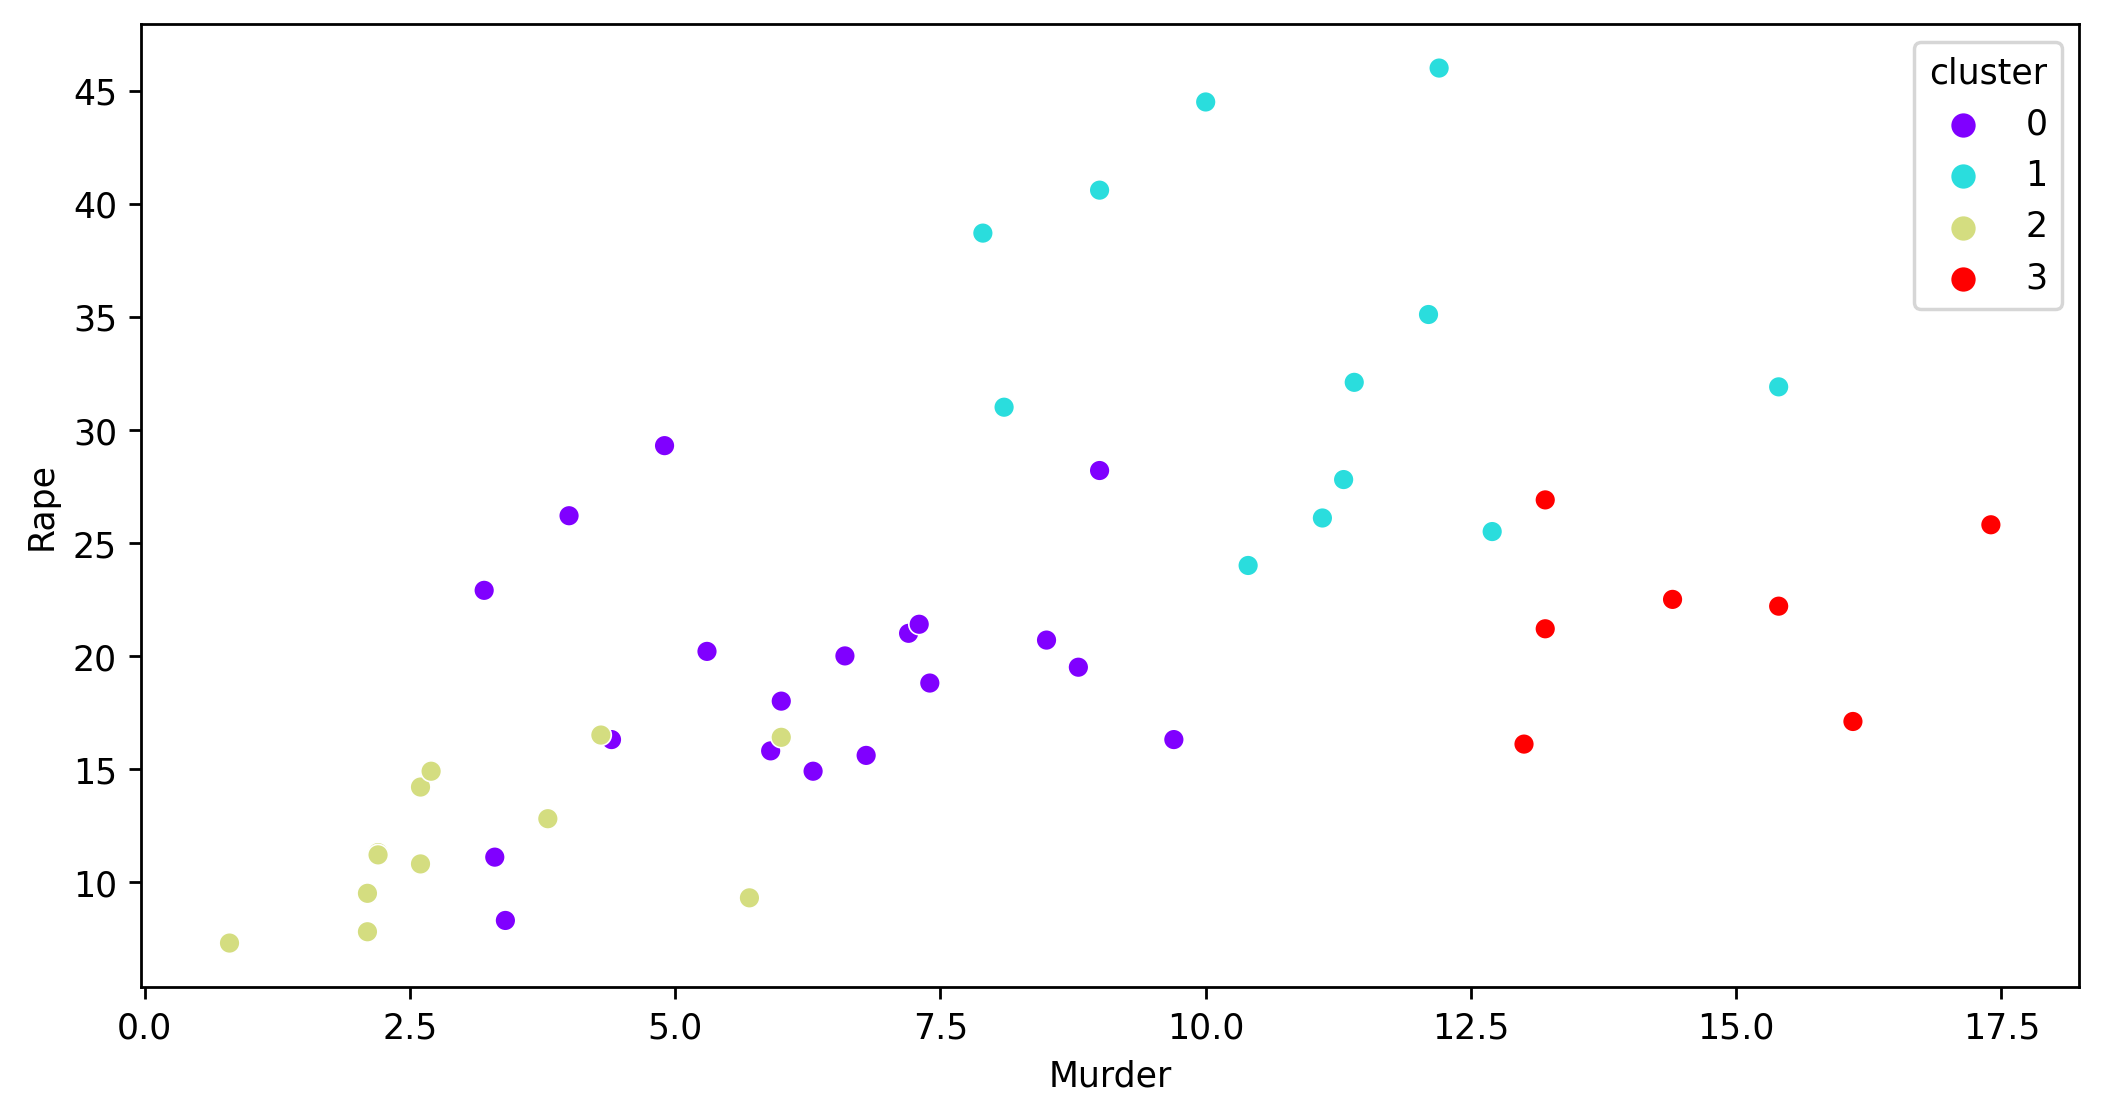

In [59]:
sb.scatterplot(df['Murder'],df['Rape'],hue=df['cluster'],palette='rainbo')

# Kmeans Algorithm

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [84]:
df1=pd.read_csv(r"D:\DS PYTHON\Assignment\crime_data.csv")

In [88]:
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [90]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

### Feature Scaling

In [93]:
x1=sc.fit_transform(df1)

### Clustering

In [96]:
km=KMeans()
y1=km.fit_predict(x1)
y1

array([4, 7, 1, 6, 1, 1, 0, 6, 1, 4, 0, 2, 1, 6, 2, 6, 6, 4, 2, 1, 0, 1,
       0, 3, 5, 6, 6, 1, 2, 0, 1, 1, 3, 2, 5, 6, 5, 0, 0, 3, 2, 4, 1, 5,
       2, 6, 5, 2, 2, 6])

### Visualizing the data frame

In [104]:
df1['cluster']=y1
df1

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,7
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,6
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,6
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,4


#### Elbow Graph

In [105]:
wcss=[]

In [106]:
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)
    

C:\Users\psaro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [107]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.10617286461216,
 45.08740202913199,
 40.166985430916895,
 36.303357339856795,
 32.23045549217983,
 29.40988315547331,
 24.595585392111914,
 23.350080140128423,
 20.80086995378212,
 20.019137831903073,
 18.203700956205154,
 16.335644116905705,
 16.49868591103789,
 15.102569179684513,
 13.854323187026004,
 13.194481835379058]

Text(0, 0.5, 'wcss value')

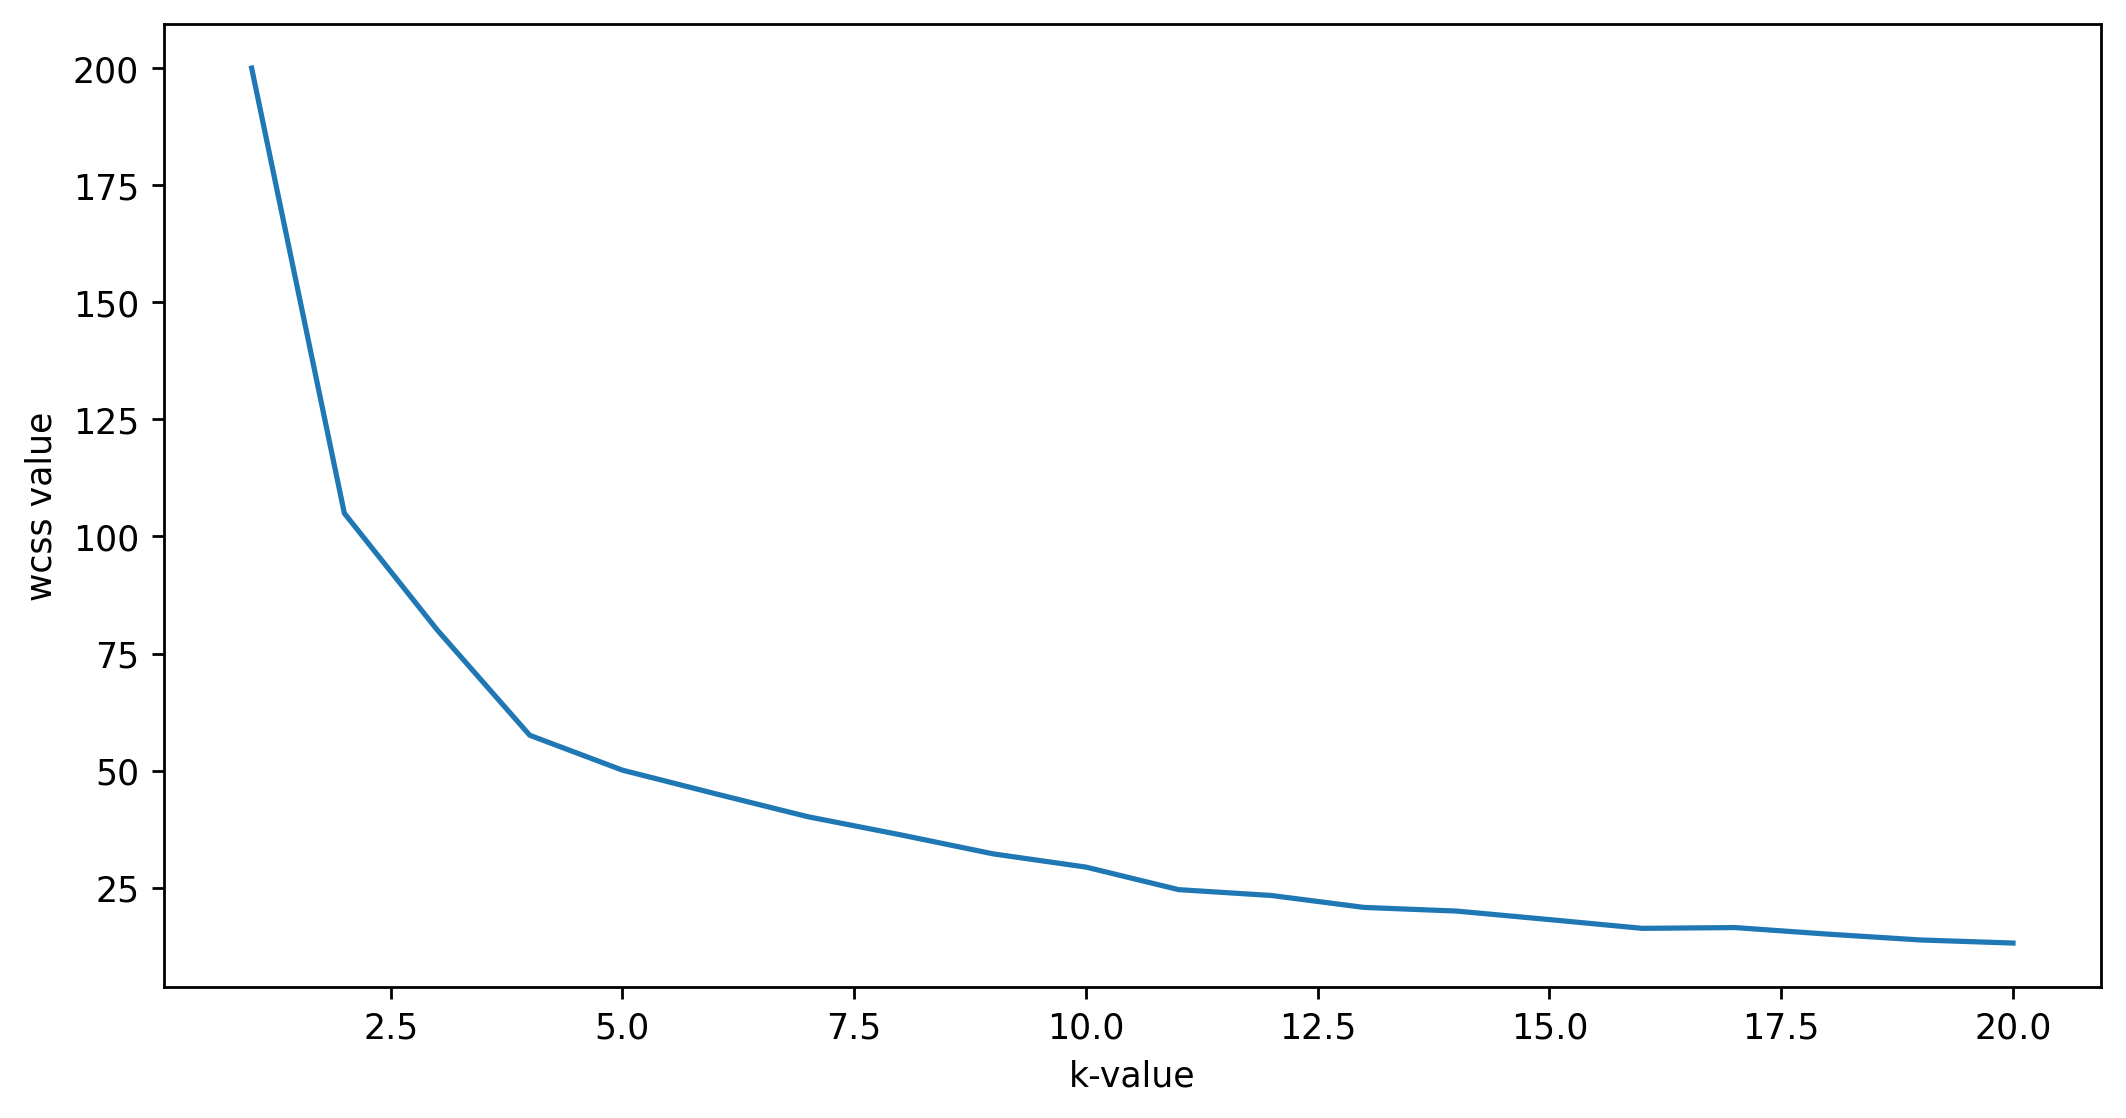

In [108]:
plt.plot(range(1,21),wcss)
plt.xlabel('k-value')
plt.ylabel('wcss value')

In [109]:
# from the above elbow graph we can draw 4 cluster as the elbow graph edge curve is near to 4

## Final Model

In [110]:
km=KMeans(n_clusters=4)
y1=km.fit_predict(x1)
y1

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [111]:
df1['cluster']=y1

In [113]:
df.head(2)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1


In [114]:
data=pd.DataFrame(x1,columns=['Murder','Assault','UrbanPop','Rape'])

In [115]:
data['cluster']=y1

In [122]:
km.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [125]:
data.head(2)

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,1


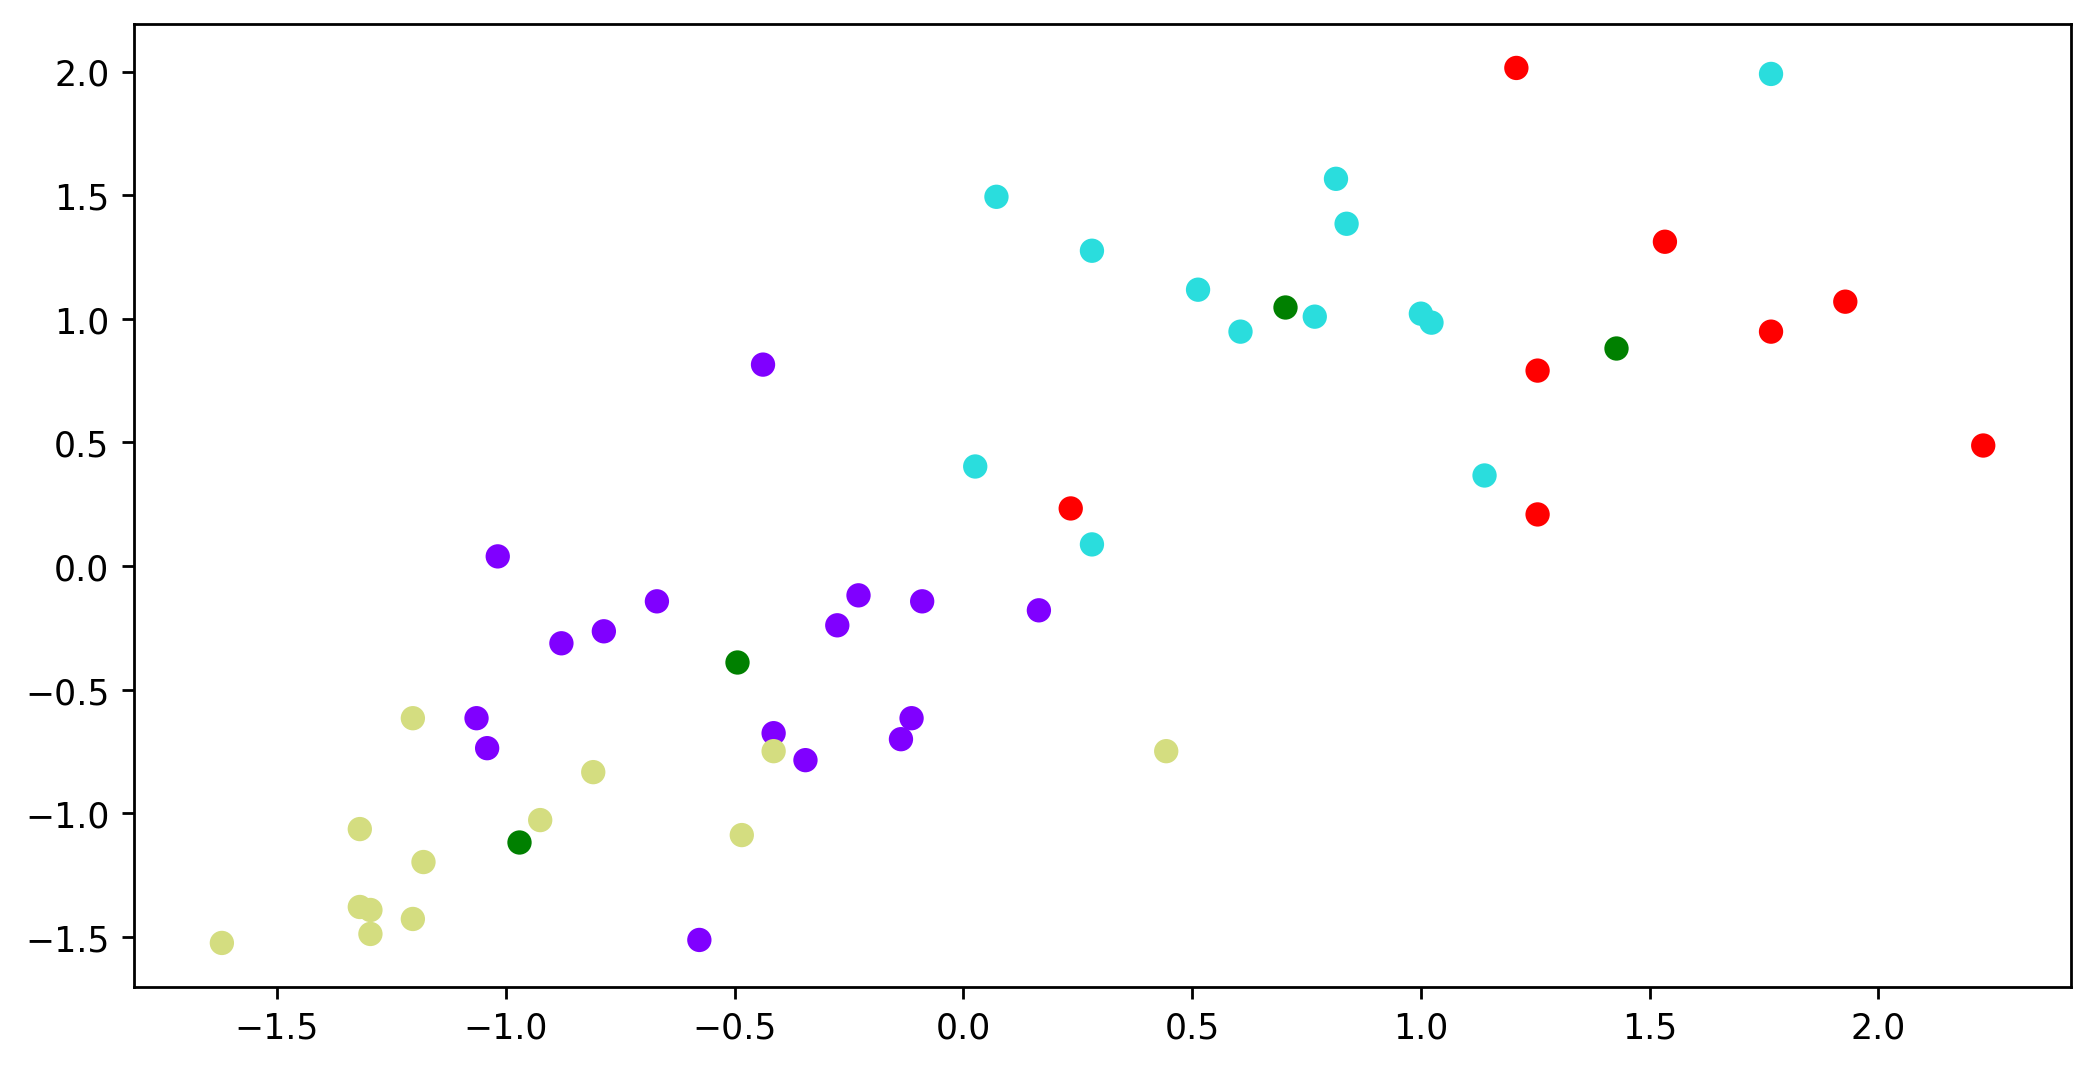

In [134]:
plt.scatter(data['Murder'],data['Assault'],c=data['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='green')

### Evaluation of KMeans

In [135]:
from sklearn.metrics import silhouette_score

In [149]:
silhouette_score(x1,y1)

0.33968891433344395

In [156]:
from yellowbrick.cluster import SilhouetteVisualizer

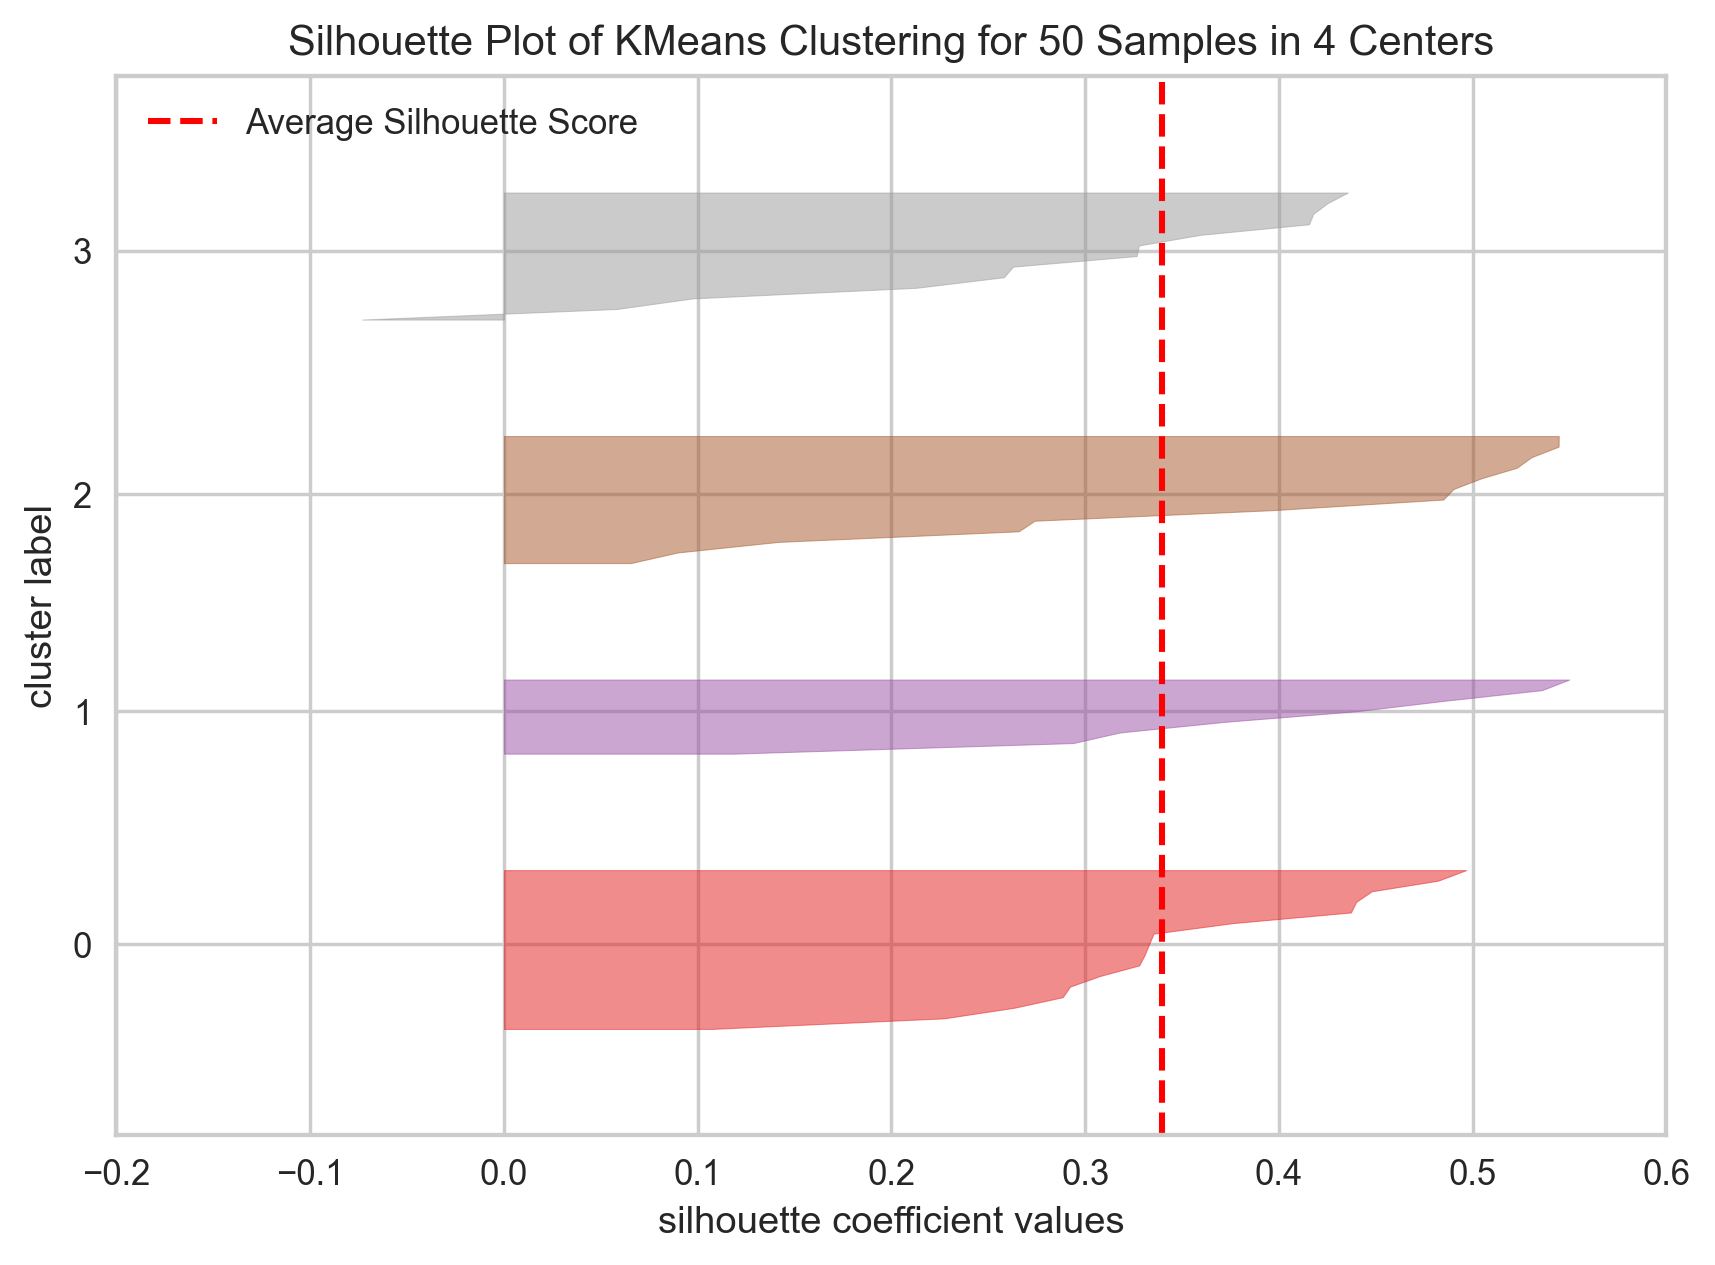

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [158]:
model=KMeans(n_clusters=4)
vis=SilhouetteVisualizer(model)
vis.fit(x1)
vis.show()

# DBSCAN Algorithm

In [160]:
df2=pd.read_csv(r"D:\DS PYTHON\Assignment\crime_data.csv")

In [162]:
df2.drop(columns=['Unnamed: 0'],inplace=True)

In [164]:
df2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [165]:
# Importing the DBScan 

In [166]:
from sklearn.cluster import DBSCAN

## Model Building

In [168]:
db=DBSCAN()
y2=db.fit_predict(x1)
y2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

### HyperParameter Tuning

In [170]:
from sklearn.neighbors import NearestNeighbors

In [173]:
neigh=NearestNeighbors(n_neighbors=12).fit(x1)
dist,ind=neigh.kneighbors(x1)

In [174]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.780062,0.849285,0.925095,1.142922,1.296218,1.302739,1.302905,1.501060,1.615635,1.620655,1.647527
1,0.0,2.078984,2.136971,2.300884,2.350139,2.359973,2.368119,2.561805,2.590086,2.726472,2.728061,2.731204
2,0.0,1.048220,1.083411,1.093542,1.206214,1.224038,1.323789,1.378889,1.612075,1.661557,1.767154,1.928755
3,0.0,1.001328,1.007227,1.070570,1.241484,1.302905,1.436899,1.439921,1.459721,1.587799,1.688723,1.724754
4,0.0,1.208977,1.300691,1.323789,1.530052,1.695750,1.819305,1.931156,2.045563,2.191845,2.253911,2.312416
5,0.0,1.248863,1.300691,1.326068,1.378889,1.413061,1.548764,1.562447,1.753967,1.807963,1.808004,1.812941
6,0.0,0.881004,0.956432,0.994373,1.045972,1.086532,1.223997,1.240510,1.295612,1.398384,1.459031,1.465794
7,0.0,1.192276,1.271401,1.423126,1.452855,1.566834,1.574294,1.596922,1.599932,1.605622,1.639528,1.651617
8,0.0,1.309743,1.349263,1.450095,1.589068,1.767154,1.770765,1.789168,1.872619,1.969837,2.045563,2.203441
9,0.0,0.867978,1.022502,1.142922,1.411191,1.598929,1.775400,1.857538,1.920844,1.938027,2.123533,2.203441


In [175]:
# Sorting the first column

In [176]:
distance=np.sort(dist[:,1],axis=0)
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

In [177]:
# plot a line chart of distance

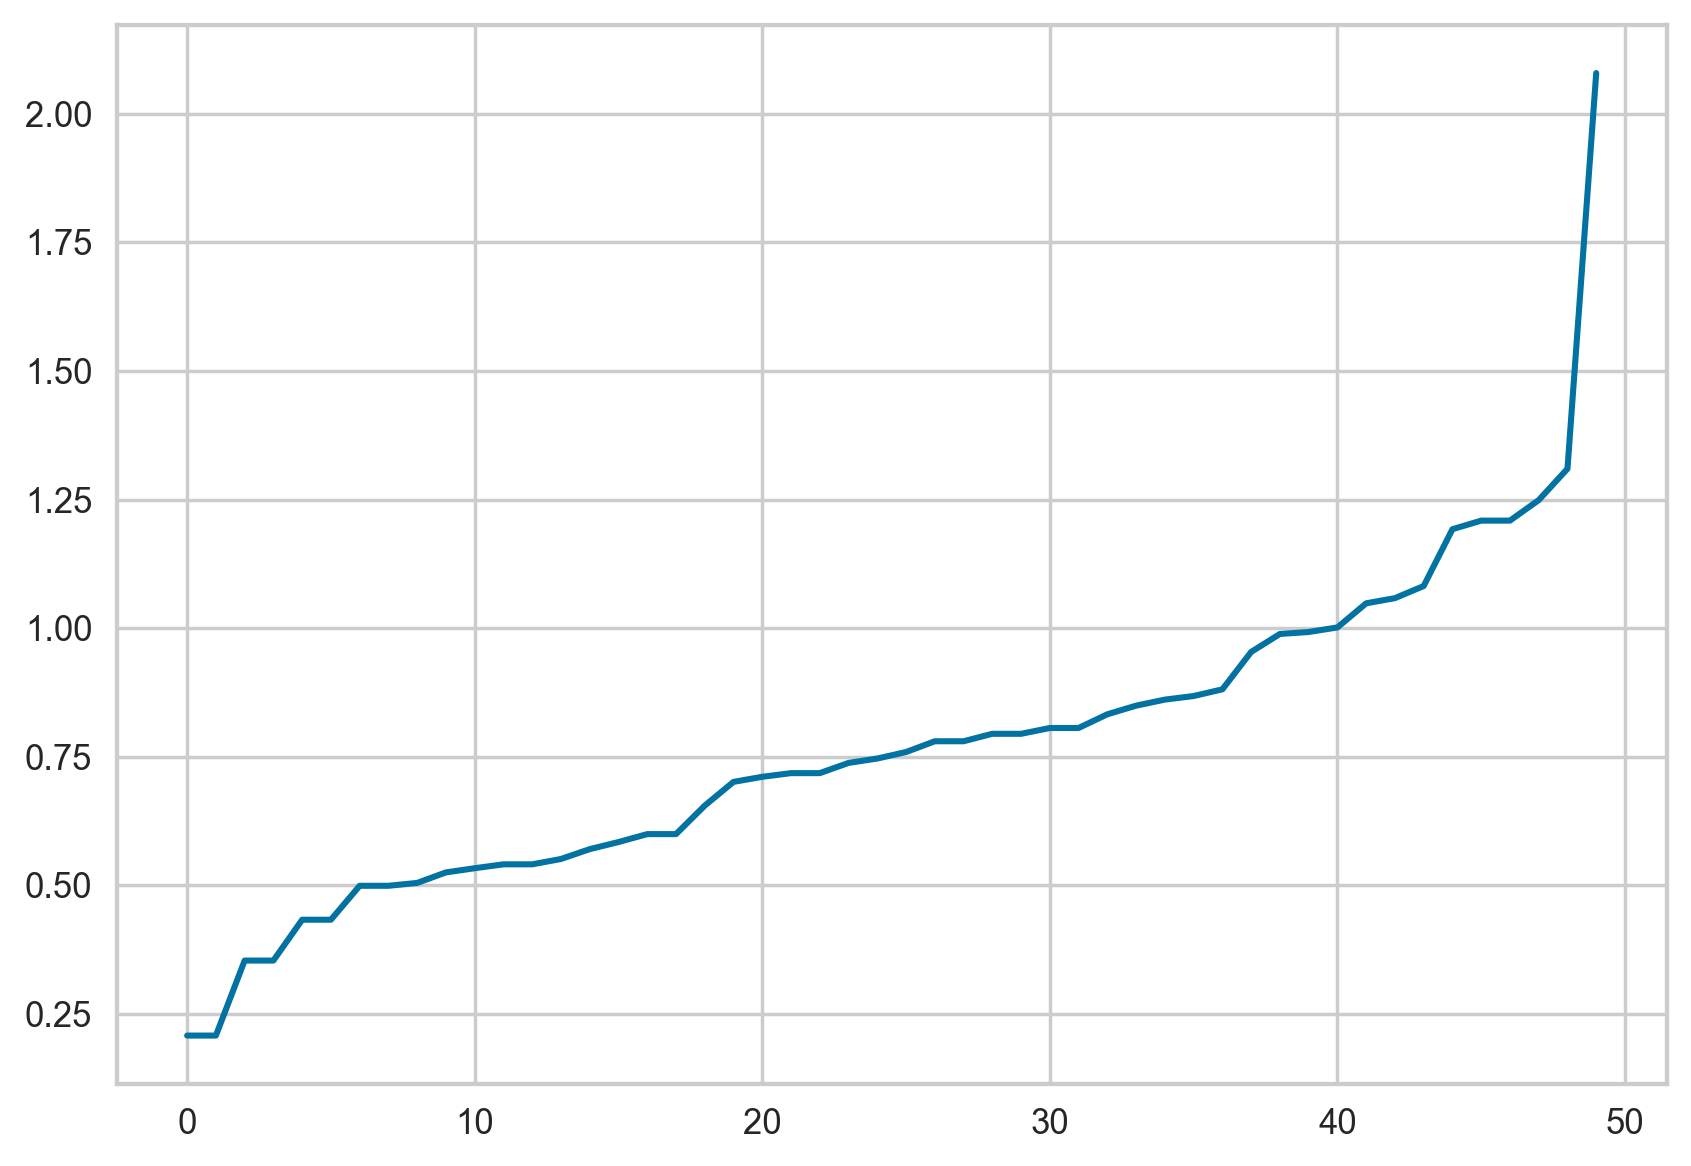

In [178]:
plt.plot(distance)

In [179]:
# creating another model

In [201]:
db=DBSCAN(eps=1.25,min_samples=8)
y2=db.fit_predict(x1)
x1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [202]:
silhouette_score(x1,y2)

0.4047944502519567

In [203]:
df2['cluster']=y2

In [204]:
# Visualize DBScan

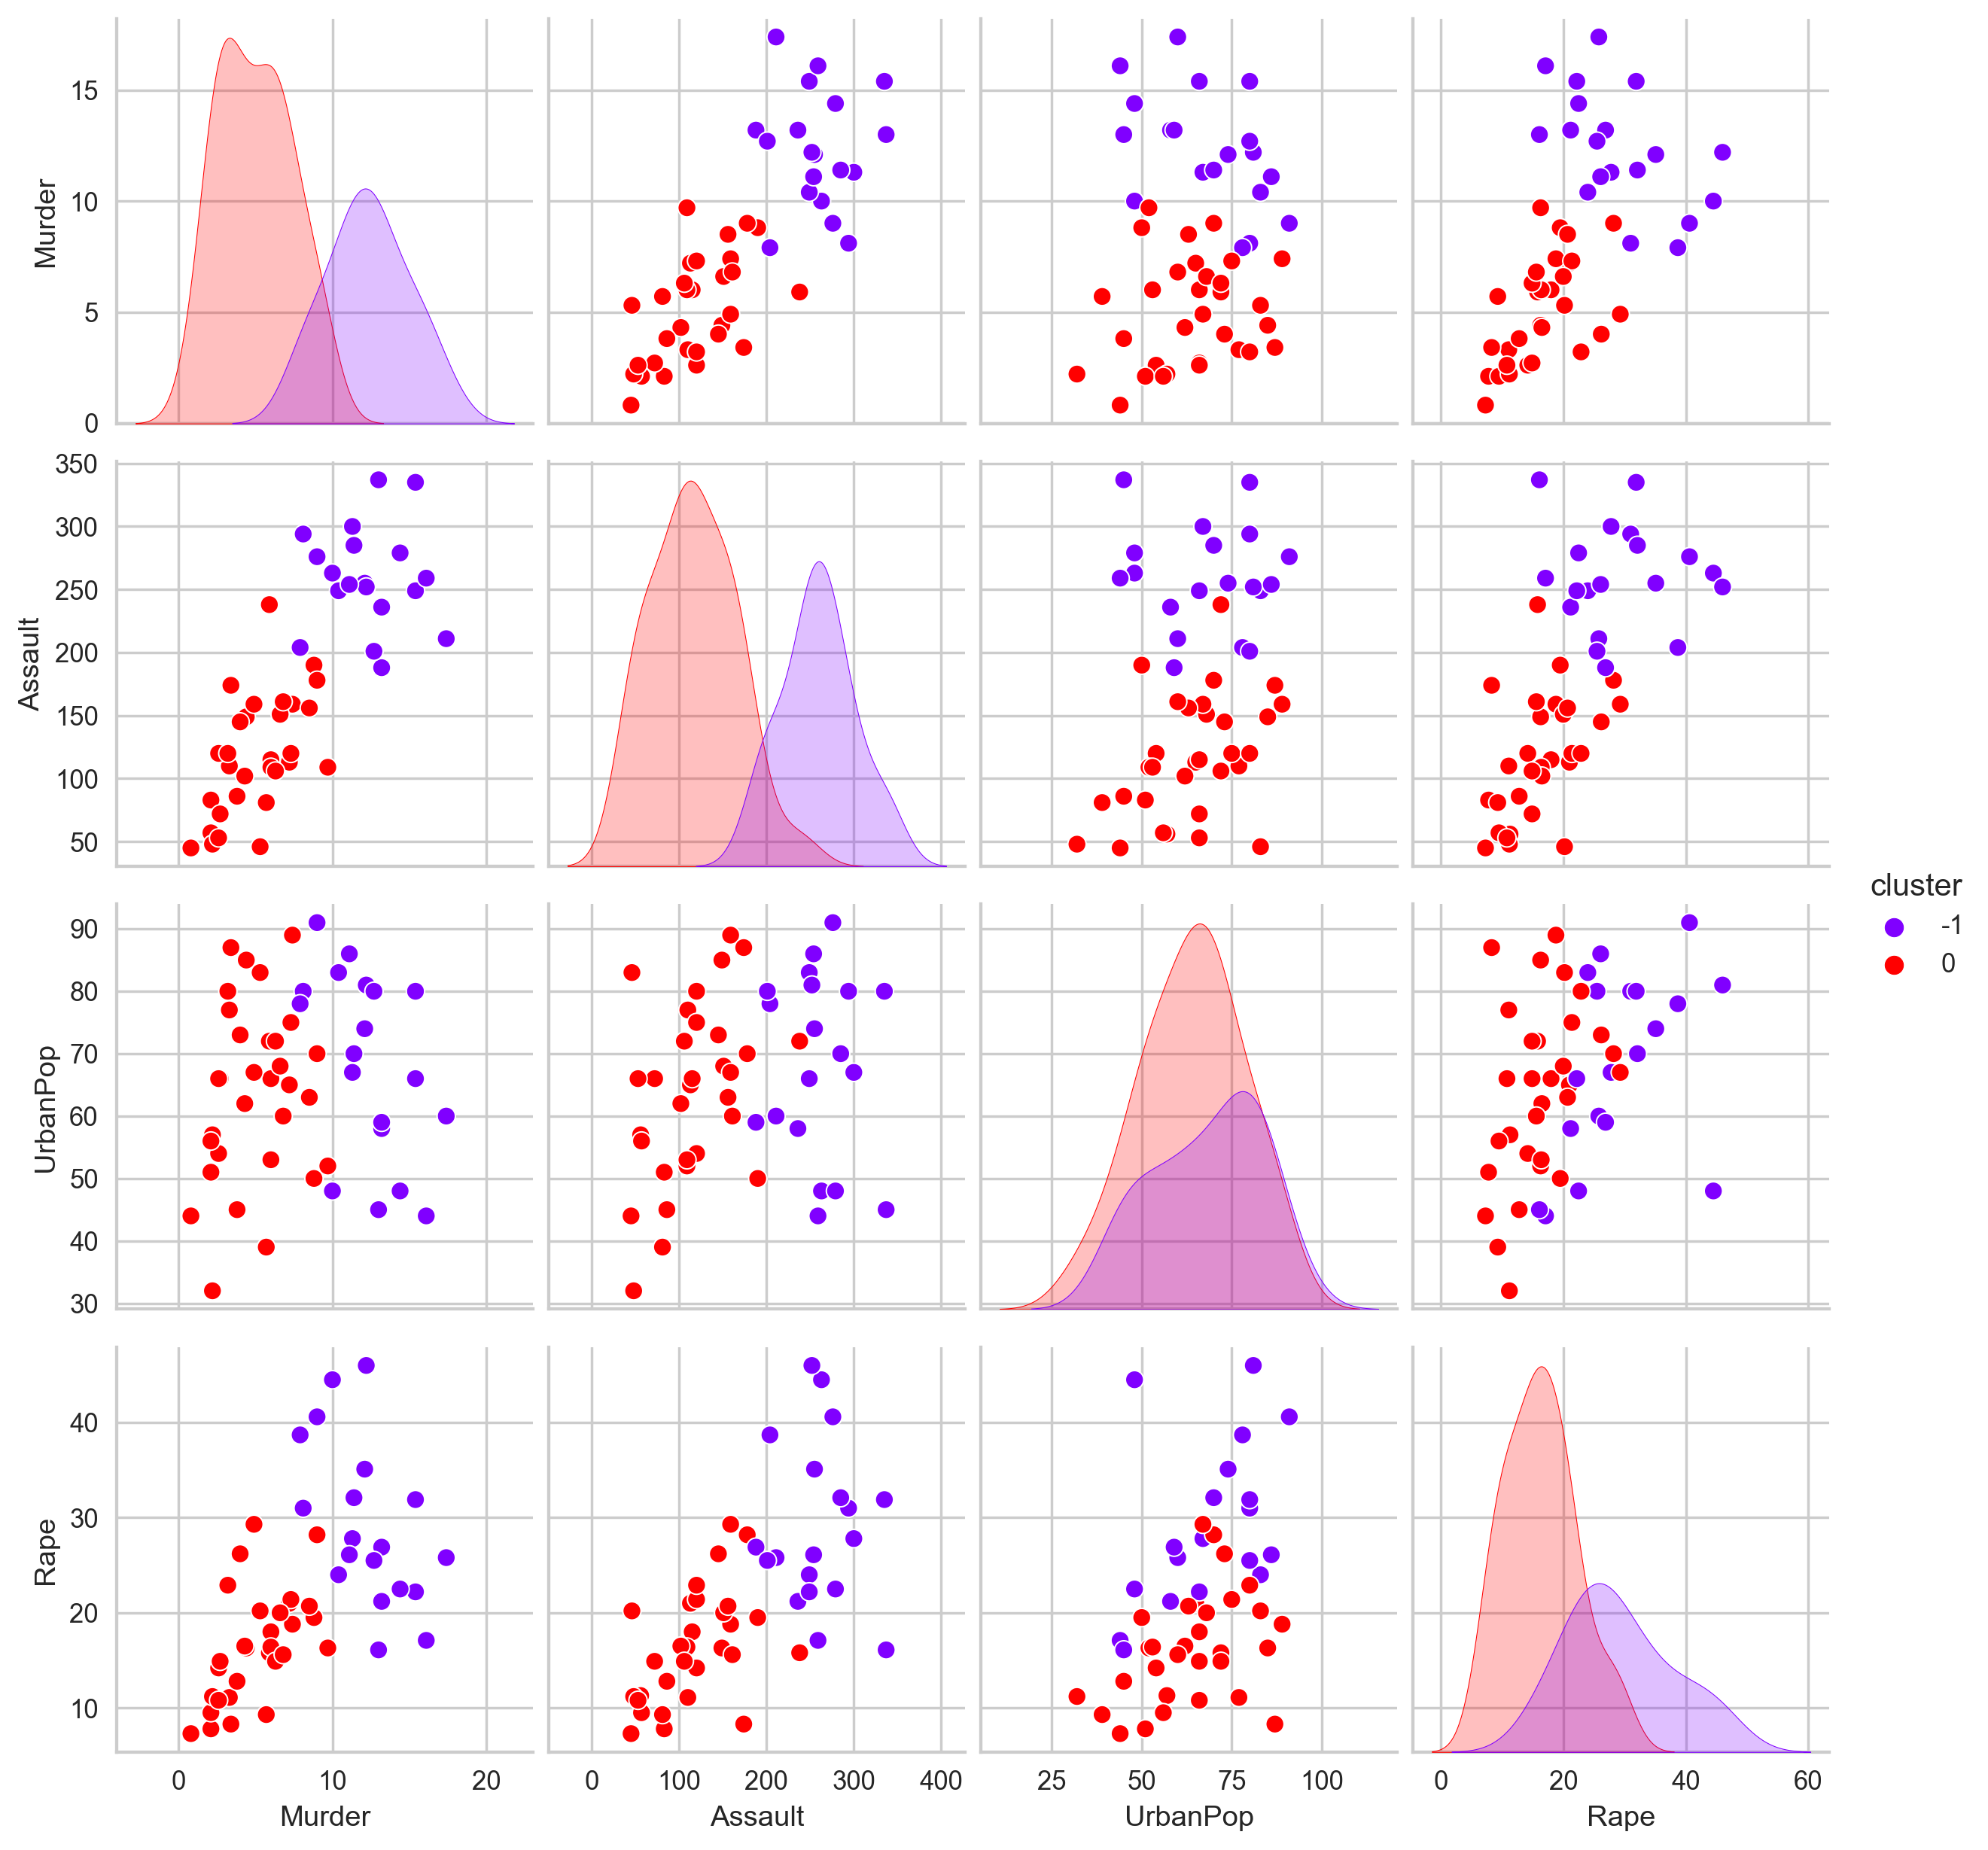

In [196]:
sb.pairplot(df2,hue='cluster',palette='rainbow')

In [205]:
# plotting for separate column

C:\Users\psaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

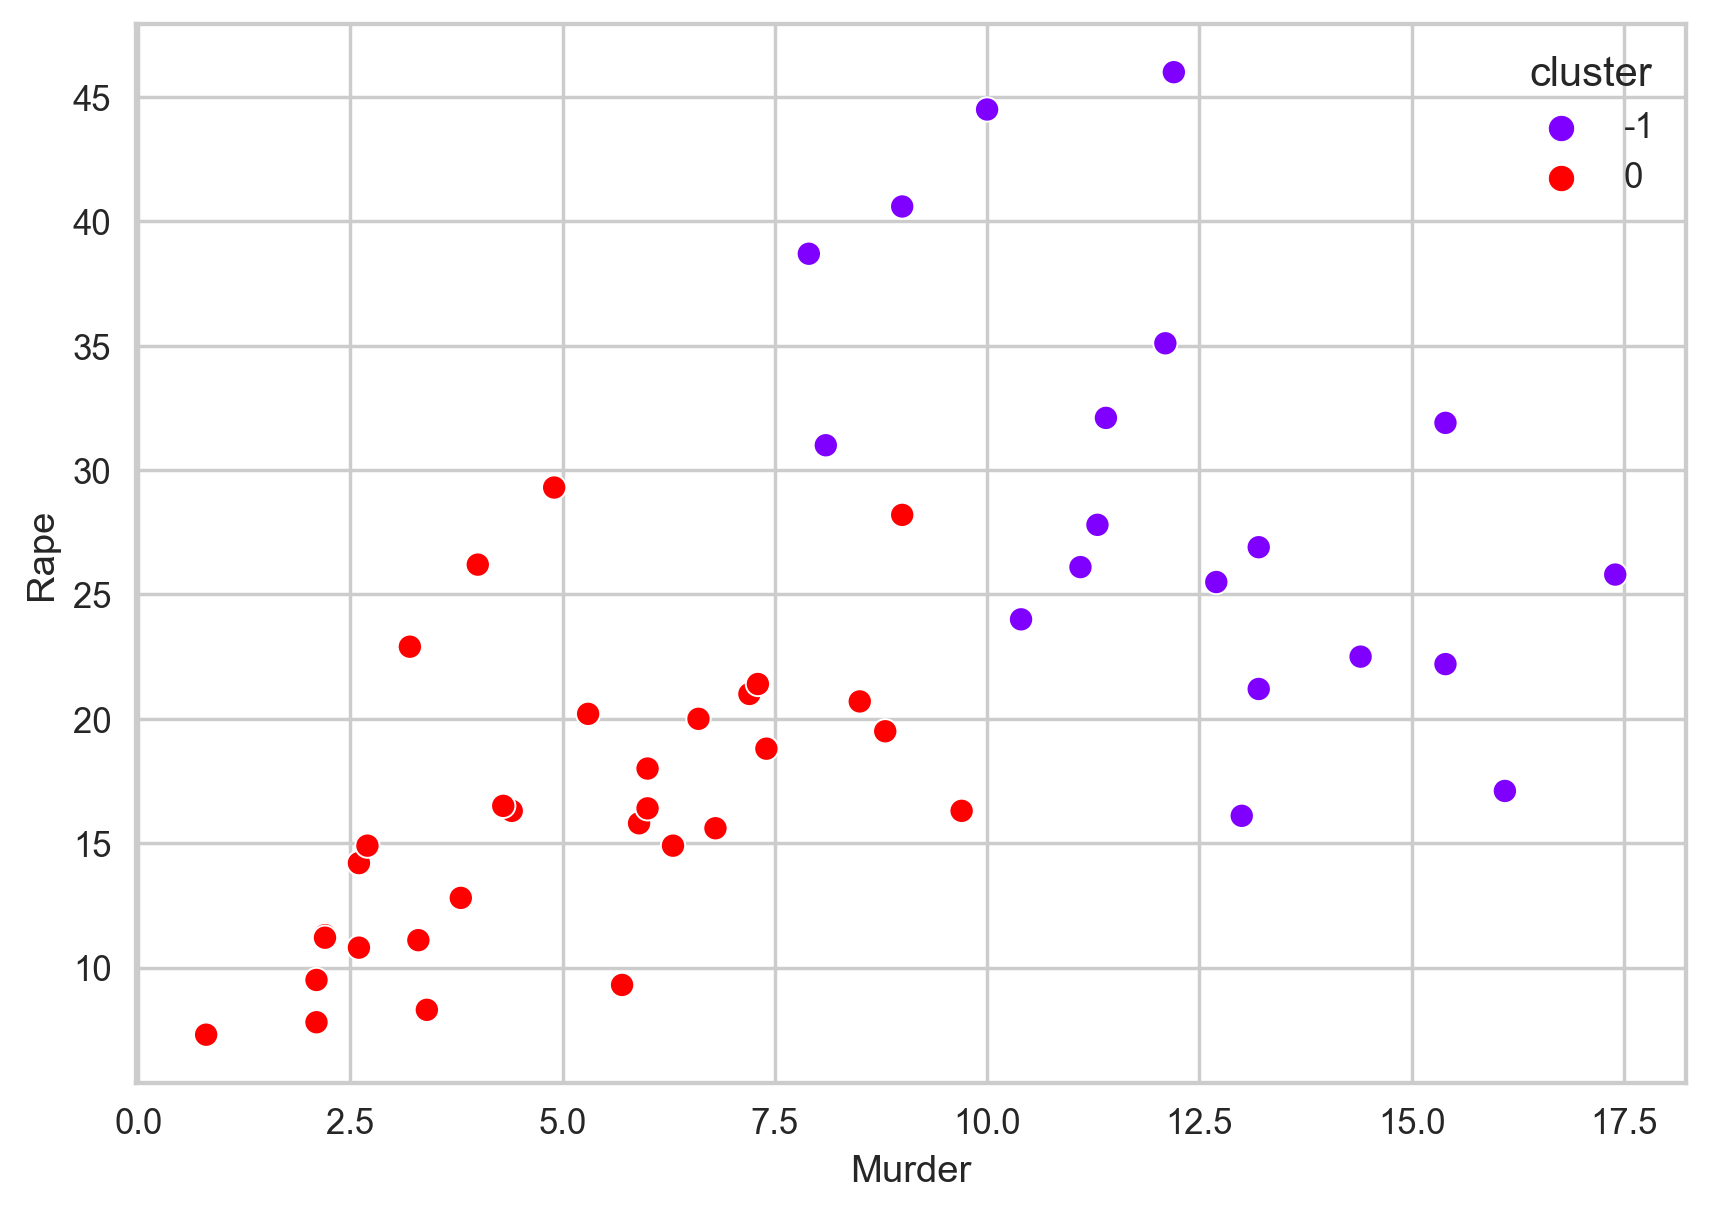

In [206]:
sb.scatterplot(df2['Murder'],df2['Rape'],hue=df2['cluster'],palette='rainbow')